<a href="https://colab.research.google.com/github/maxlshk/python-big-data/blob/main/Project_Loshak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 386.6/386.6 kB 13.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 23.1 MB/s eta 0:00:00


# –ü—ñ–¥–≥–æ—Ç–æ–≤–∫–∞ —Å–µ—Ä–µ–¥–æ–≤–∏—â–∞ —Ç–∞ —ñ–º–ø–æ—Ä—Ç –±—ñ–±–ª—ñ–æ—Ç–µ–∫

In [3]:
from google.colab import drive
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, random_split, Subset
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import itertools
import pandas as pd
import optuna

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è —Ç–∞ —Ä–æ–∑–ø–∞–∫—É–≤–∞–Ω–Ω—è –¥–∞—Ç–∞—Å–µ—Ç—É Intel Image Classification

Intel Image Classification - —Ü–µ –Ω–∞–±—ñ—Ä –¥–∞–Ω–∏—Ö, —â–æ –º—ñ—Å—Ç–∏—Ç—å –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è —à–µ—Å—Ç–∏ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π: –±—É–¥—ñ–≤–ª—ñ, –ª—ñ—Å–∏, –ª—å–æ–¥–æ–≤–∏–∫–∏, –≥–æ—Ä–∏, –º–æ—Ä–µ —Ç–∞ –≤—É–ª–∏—Ü—ñ.

–ú–∏ –ø—ñ–¥–∫–ª—é—á–∞—î–º–æ Google Drive –¥–ª—è –¥–æ—Å—Ç—É–ø—É –¥–æ –∞—Ä—Ö—ñ–≤—É –∑ –¥–∞—Ç–∞—Å–µ—Ç–æ–º —Ç–∞ —Ä–æ–∑–ø–∞–∫–æ–≤—É—î–º–æ –π–æ–≥–æ –≤ —Ä–æ–±–æ—á—É –¥–∏—Ä–µ–∫—Ç–æ—Ä—ñ—é. –î–∞—Ç–∞—Å–µ—Ç —Ä–æ–∑–¥—ñ–ª–µ–Ω–∏–π –Ω–∞ —Ç—Ä–∏ —á–∞—Å—Ç–∏–Ω–∏:
- seg_train: –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –¥–ª—è –Ω–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
- seg_test: –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –¥–ª—è —Ç–µ—Å—Ç—É–≤–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ –ø—ñ—Å–ª—è –Ω–∞–≤—á–∞–Ω–Ω—è
- seg_pred: –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑—É–≤–∞–Ω–Ω—è –±–µ–∑ –º—ñ—Ç–æ–∫

–ó–∞–≥–∞–ª–æ–º –¥–∞—Ç–∞—Å–µ—Ç –º—ñ—Å—Ç–∏—Ç—å –±–ª–∏–∑—å–∫–æ 25000 –∑–æ–±—Ä–∞–∂–µ–Ω—å —Ä–æ–∑–º—ñ—Ä–æ–º 150x150 –ø—ñ–∫—Å–µ–ª—ñ–≤.

In [4]:
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Intel_Image_Classification.zip'
train_dir = 'seg_train/seg_train'
test_dir = 'seg_test/seg_test'

!unzip -q {zip_path} -d /content/

Mounted at /content/drive


# –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è —Ç–∞ –∞—É–≥–º–µ–Ω—Ç–∞—Ü—ñ—è –¥–∞–Ω–∏—Ö
–∑–∞—Å—Ç–æ—Å–æ–≤—É—î–º–æ —Ä—ñ–∑–Ω—ñ –ø–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è –¥–æ –∑–æ–±—Ä–∞–∂–µ–Ω—å:

1. **–î–ª—è –Ω–∞–≤—á–∞–ª—å–Ω–æ–≥–æ –Ω–∞–±–æ—Ä—É –¥–∞–Ω–∏—Ö:**
   - –ó–º—ñ–Ω–∞ —Ä–æ–∑–º—ñ—Ä—É –¥–æ 150x150 –ø—ñ–∫—Å–µ–ª—ñ–≤
   - –í–∏–ø–∞–¥–∫–æ–≤–µ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–µ –≤—ñ–¥–æ–±—Ä–∞–∂–µ–Ω–Ω—è –¥–ª—è –∑–±—ñ–ª—å—à–µ–Ω–Ω—è —Ä—ñ–∑–Ω–æ–º–∞–Ω—ñ—Ç–Ω–æ—Å—Ç—ñ –¥–∞–Ω–∏—Ö
   - –í–∏–ø–∞–¥–∫–æ–≤–µ –æ–±–µ—Ä—Ç–∞–Ω–Ω—è –Ω–∞ 10 –≥—Ä–∞–¥—É—Å—ñ–≤ –¥–ª—è –∑–±—ñ–ª—å—à–µ–Ω–Ω—è —Ä—ñ–∑–Ω–æ–º–∞–Ω—ñ—Ç–Ω–æ—Å—Ç—ñ –¥–∞–Ω–∏—Ö
   - –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è –≤ —Ç–µ–Ω–∑–æ—Ä
   - –ù–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º —Å–µ—Ä–µ–¥–Ω—ñ—Ö –∑–Ω–∞—á–µ–Ω—å —Ç–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∏—Ö –≤—ñ–¥—Ö–∏–ª–µ–Ω—å ImageNet

2. **–î–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä—É –¥–∞–Ω–∏—Ö:**
   - –õ–∏—à–µ –∑–º—ñ–Ω–∞ —Ä–æ–∑–º—ñ—Ä—É, –ø–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è –≤ —Ç–µ–Ω–∑–æ—Ä —Ç–∞ –Ω–æ—Ä–º–∞–ª—ñ–∑–∞—Ü—ñ—è

–ê—É–≥–º–µ–Ω—Ç–∞—Ü—ñ—è –¥–∞–Ω–∏—Ö –¥–æ–ø–æ–º–∞–≥–∞—î –º–æ–¥–µ–ª—ñ –∫—Ä–∞—â–µ —É–∑–∞–≥–∞–ª—å–Ω—é–≤–∞—Ç–∏ —Ç–∞ –∑–∞–ø–æ–±—ñ–≥–∞—î –ø–µ—Ä–µ–Ω–∞–≤—á–∞–Ω–Ω—é.

In [5]:
train_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è —Ç–∞ —Ä–æ–∑–¥—ñ–ª–µ–Ω–Ω—è –¥–∞—Ç–∞—Å–µ—Ç—É

–£ —Ü—å–æ–º—É —Ä–æ–∑–¥—ñ–ª—ñ –º–∏ –∑–∞–≤–∞–Ω—Ç–∞–∂—É—î–º–æ –ø–æ–≤–Ω–∏–π –Ω–∞–±—ñ—Ä –¥–∞–Ω–∏—Ö –¥–ª—è –Ω–∞–≤—á–∞–Ω–Ω—è, –∞ –ø–æ—Ç—ñ–º —Ä–æ–∑–¥—ñ–ª—è—î–º–æ –π–æ–≥–æ –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—É —Ç–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—É —á–∞—Å—Ç–∏–Ω–∏ (80% —Ç–∞ 20% –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ). –¢–µ—Å—Ç–æ–≤–∏–π –Ω–∞–±—ñ—Ä –¥–∞–Ω–∏—Ö –∑–∞–≤–∞–Ω—Ç–∞–∂—É—î—Ç—å—Å—è –æ–∫—Ä–µ–º–æ.

–î–ª—è –∑–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –∑–æ–±—Ä–∞–∂–µ–Ω—å –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ torchvision.datasets.ImageFolder, —è–∫–∏–π –∞–≤—Ç–æ–º–∞—Ç–∏—á–Ω–æ –ø—Ä–∏–∑–Ω–∞—á–∞—î –∫–ª–∞—Å–∏ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è–º –Ω–∞ –æ—Å–Ω–æ–≤—ñ —Å—Ç—Ä—É–∫—Ç—É—Ä–∏ –¥–∏—Ä–µ–∫—Ç–æ—Ä—ñ–π. –î–ª—è —Ä–æ–∑–¥—ñ–ª–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ random_split –∑ PyTorch, —è–∫–∏–π –≤–∏–ø–∞–¥–∫–æ–≤–∏–º —á–∏–Ω–æ–º —Ä–æ–∑–¥—ñ–ª—è—î –¥–∞–Ω—ñ –Ω–∞ –ø—ñ–¥–º–Ω–æ–∂–∏–Ω–∏ –∑–∞–¥–∞–Ω–æ–≥–æ —Ä–æ–∑–º—ñ—Ä—É.

In [6]:
full_train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è DataLoader –¥–ª—è –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–≥–æ –∑–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –¥–∞–Ω–∏—Ö

DataLoader - —Ü–µ –∫–ª–∞—Å —É PyTorch, —è–∫–∏–π –¥–æ–ø–æ–º–∞–≥–∞—î –Ω–∞–º –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –∑–∞–≤–∞–Ω—Ç–∞–∂—É–≤–∞—Ç–∏ –¥–∞–Ω—ñ –ø—ñ–¥ —á–∞—Å –Ω–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ

–ú–∏ —Å—Ç–≤–æ—Ä—é—î–º–æ —Ç—Ä–∏ DataLoader:
1. **train_loader** - –¥–ª—è —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–∏—Ö –¥–∞–Ω–∏—Ö –∑ –ø–µ—Ä–µ–º—ñ—à—É–≤–∞–Ω–Ω—è–º
2. **val_loader** - –¥–ª—è –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö –±–µ–∑ –ø–µ—Ä–µ–º—ñ—à—É–≤–∞–Ω–Ω—è
3. **test_loader** - –¥–ª—è —Ç–µ—Å—Ç–æ–≤–∏—Ö –¥–∞–Ω–∏—Ö –±–µ–∑ –ø–µ—Ä–µ–º—ñ—à—É–≤–∞–Ω–Ω—è

–†–æ–∑–º—ñ—Ä –ø–∞–∫–µ—Ç—É (batch_size) –≤—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ –Ω–∞ 32, —â–æ —î –∫–æ–º–ø—Ä–æ–º—ñ—Å–æ–º –º—ñ–∂ —à–≤–∏–¥–∫—ñ—Å—Ç—é –Ω–∞–≤—á–∞–Ω–Ω—è —Ç–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º –ø–∞–º'—è—Ç—ñ.

In [7]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó –∑–æ–±—Ä–∞–∂–µ–Ω—å


In [8]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

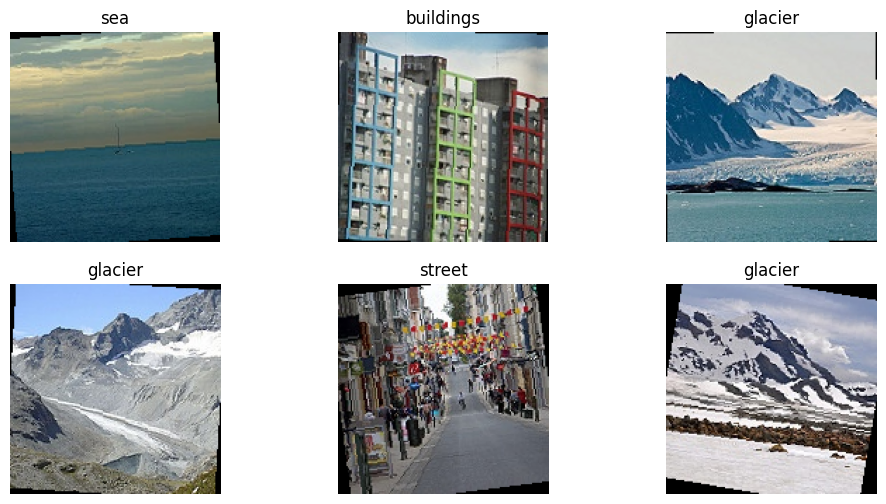

In [9]:
inputs, classes = next(iter(train_loader))
plt.figure(figsize=(12, 6))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    imshow(inputs[i], title=full_train_dataset.classes[classes[i]])
plt.show()

# –†–æ–∑–ø–æ–¥—ñ–ª –∫–ª–∞—Å—ñ–≤ —É —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö

–¶–µ–π –≥—Ä–∞—Ñ—ñ–∫ –ø–æ–∫–∞–∑—É—î –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∑–æ–±—Ä–∞–∂–µ–Ω—å –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∫–ª–∞—Å—É –≤ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö.

In [10]:
class_counts = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

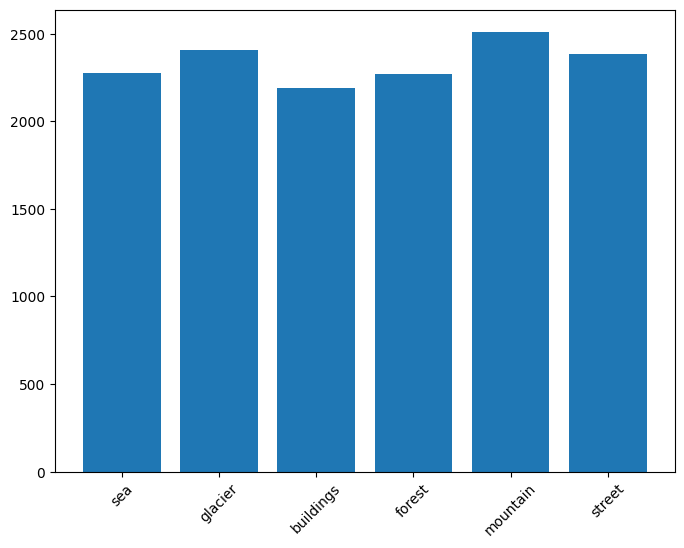

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.show()


# –ê—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞ –ø—Ä–æ—Å—Ç–æ—ó –∑–≥–æ—Ä—Ç–∫–æ–≤–æ—ó –Ω–µ–π—Ä–æ–Ω–Ω–æ—ó –º–µ—Ä–µ–∂—ñ (CNN)

–≤–∏–∑–Ω–∞—á–∞—î–º–æ –∞—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä—É –ø—Ä–æ—Å—Ç–æ—ó –∑–≥–æ—Ä—Ç–∫–æ–≤–æ—ó –Ω–µ–π—Ä–æ–Ω–Ω–æ—ó –º–µ—Ä–µ–∂—ñ (CNN) –¥–ª—è –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó –∑–æ–±—Ä–∞–∂–µ–Ω—å.

1. **–ó–≥–æ—Ä—Ç–∫–æ–≤—ñ —à–∞—Ä–∏:**
   - –ü–µ—Ä—à–∏–π —à–∞—Ä: 3 -> 32 –∫–∞–Ω–∞–ª–∏ (–¥–ª—è –æ–±—Ä–æ–±–∫–∏ RGB –∑–æ–±—Ä–∞–∂–µ–Ω—å)
   - –î—Ä—É–≥–∏–π —à–∞—Ä: 32 -> 64 –∫–∞–Ω–∞–ª–∏
   - –¢—Ä–µ—Ç—ñ–π —à–∞—Ä: 64 -> 128 –∫–∞–Ω–∞–ª—ñ–≤
   
   –ö–æ–∂–µ–Ω –∑–≥–æ—Ä—Ç–∫–æ–≤–∏–π —à–∞—Ä –≤–∫–ª—é—á–∞—î:
   - –ó–≥–æ—Ä—Ç–∫—É –∑ —è–¥—Ä–æ–º 3x3 –∑ –≤—ñ–¥—Å—Ç—É–ø–æ–º 1
   - –ê–∫—Ç–∏–≤–∞—Ü—ñ—é ReLU –¥–ª—è –≤–≤–µ–¥–µ–Ω–Ω—è –Ω–µ–ª—ñ–Ω—ñ–π–Ω–æ—Å—Ç—ñ
   - –ú–∞–∫—Å-–ø—É–ª—ñ–Ω–≥ –∑ —Ä–æ–∑–º—ñ—Ä–æ–º 2x2 –¥–ª—è –∑–º–µ–Ω—à–µ–Ω–Ω—è –ø—Ä–æ—Å—Ç–æ—Ä–æ–≤–∏—Ö —Ä–æ–∑–º—ñ—Ä—ñ–≤

2. **–ê–¥–∞–ø—Ç–∏–≤–Ω–∏–π –ø—É–ª—ñ–Ω–≥** –¥–ª—è –æ—Ç—Ä–∏–º–∞–Ω–Ω—è —Ñ—ñ–∫—Å–æ–≤–∞–Ω–æ–≥–æ —Ä–æ–∑–º—ñ—Ä—É –≤–∏—Ö–æ–¥—É –Ω–µ–∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥ —Ä–æ–∑–º—ñ—Ä—É –≤—Ö—ñ–¥–Ω–æ–≥–æ –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è

3. **–ü–æ–≤–Ω–æ–∑–≤'—è–∑–Ω—ñ —à–∞—Ä–∏:**
   - –ü–µ—Ä—à–∏–π FC —à–∞—Ä: 128 -> 128 –Ω–µ–π—Ä–æ–Ω—ñ–≤
   - Dropout –∑ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—é 0.5 –¥–ª—è –∑–∞–ø–æ–±—ñ–≥–∞–Ω–Ω—è –ø–µ—Ä–µ–Ω–∞–≤—á–∞–Ω–Ω—é
   - –î—Ä—É–≥–∏–π FC —à–∞—Ä: 128 -> 6 –Ω–µ–π—Ä–æ–Ω—ñ–≤ (–ø–æ –æ–¥–Ω–æ–º—É –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ –∫–ª–∞—Å—É)


In [12]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=6):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x



In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / val_total)
    val_accs.append(val_correct / val_total)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Val Loss: {val_loss/val_total:.4f} Acc: {val_correct/val_total:.4f}")


Epoch 1/20 - Train Loss: 1.2758 Acc: 0.4601 | Val Loss: 1.0274 Acc: 0.5932
Epoch 2/20 - Train Loss: 1.0152 Acc: 0.5864 | Val Loss: 0.9652 Acc: 0.5700
Epoch 3/20 - Train Loss: 0.9030 Acc: 0.6352 | Val Loss: 0.8606 Acc: 0.6441
Epoch 4/20 - Train Loss: 0.8234 Acc: 0.6802 | Val Loss: 0.7364 Acc: 0.7186
Epoch 5/20 - Train Loss: 0.7695 Acc: 0.7079 | Val Loss: 0.6942 Acc: 0.7321
Epoch 6/20 - Train Loss: 0.7230 Acc: 0.7278 | Val Loss: 0.6385 Acc: 0.7620
Epoch 7/20 - Train Loss: 0.6806 Acc: 0.7445 | Val Loss: 0.5971 Acc: 0.7870
Epoch 8/20 - Train Loss: 0.6320 Acc: 0.7608 | Val Loss: 0.5657 Acc: 0.8087
Epoch 9/20 - Train Loss: 0.6085 Acc: 0.7802 | Val Loss: 0.5494 Acc: 0.8041
Epoch 10/20 - Train Loss: 0.5683 Acc: 0.7948 | Val Loss: 0.5096 Acc: 0.8240
Epoch 11/20 - Train Loss: 0.5613 Acc: 0.7964 | Val Loss: 0.5010 Acc: 0.8269
Epoch 12/20 - Train Loss: 0.5316 Acc: 0.8084 | Val Loss: 0.5536 Acc: 0.7944
Epoch 13/20 - Train Loss: 0.5267 Acc: 0.8125 | Val Loss: 0.4729 Acc: 0.8343
Epoch 14/20 - Train L

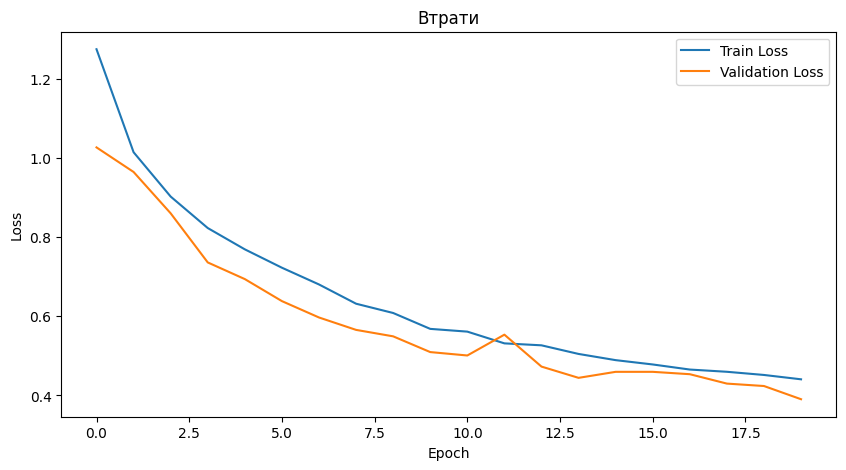

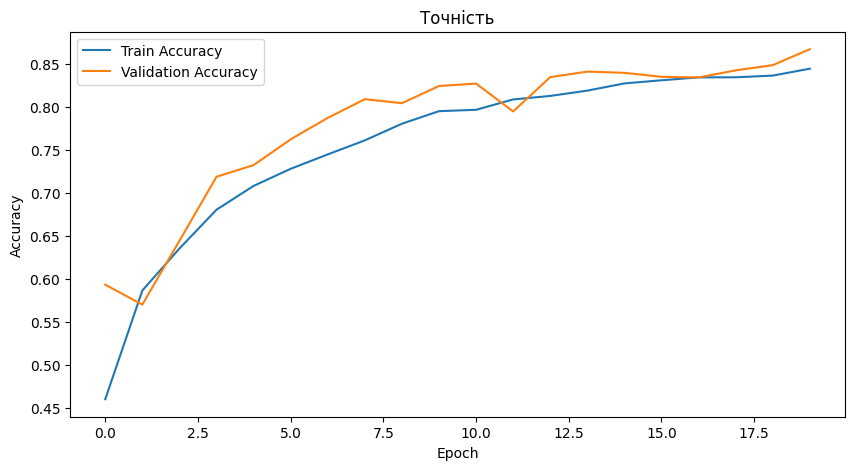

In [39]:
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("–í—Ç—Ä–∞—Ç–∏")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("–¢–æ—á–Ω—ñ—Å—Ç—å")
plt.legend()
plt.show()

# –û–ø—Ç–∏–º—ñ–∑–æ–≤–∞–Ω–∞ –∞—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∞ CNN –∑ –≥–Ω—É—á–∫–∏–º–∏ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

—Ü–µ —É–¥–æ—Å–∫–æ–Ω–∞–ª–µ–Ω–∞ –≤–µ—Ä—Å—ñ—è –Ω–∞—à–æ—ó –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ—ó CNN –º–æ–¥–µ–ª—ñ, —è–∫–∞ –¥–æ–∑–≤–æ–ª—è—î –≥–Ω—É—á–∫–æ –Ω–∞–ª–∞—à—Ç–æ–≤—É–≤–∞—Ç–∏ –æ—Å–Ω–æ–≤–Ω—ñ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –∞—Ä—Ö—ñ—Ç–µ–∫—Ç—É—Ä–∏:

1. **num_conv_layers** - –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∑–≥–æ—Ä—Ç–∫–æ–≤–∏—Ö —à–∞—Ä—ñ–≤ (–≤—ñ–¥ 2 –¥–æ 4)
2. **dense_units** - –∫—ñ–ª—å–∫—ñ—Å—Ç—å –Ω–µ–π—Ä–æ–Ω—ñ–≤ —É –ø–æ–≤–Ω–æ–∑–≤'—è–∑–Ω–æ–º—É —à–∞—Ä—ñ (128, 256 –∞–±–æ 512)

–¶—è –º–æ–¥–µ–ª—å –¥–∏–Ω–∞–º—ñ—á–Ω–æ —Å—Ç–≤–æ—Ä—é—î –∑–≥–æ—Ä—Ç–∫–æ–≤—ñ —à–∞—Ä–∏ –Ω–∞ –æ—Å–Ω–æ–≤—ñ –∑–∞–¥–∞–Ω–æ—ó –∫—ñ–ª—å–∫–æ—Å—Ç—ñ. –î–ª—è –ø–µ—Ä—à–∏—Ö —Ç—Ä—å–æ—Ö —à–∞—Ä—ñ–≤ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—Ç—å—Å—è —Ñ—ñ–∫—Å–æ–≤–∞–Ω—ñ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ —Ñ—ñ–ª—å—Ç—Ä—ñ–≤ (32, 64, 128), –∞ –¥–ª—è –¥–æ–¥–∞—Ç–∫–æ–≤–∏—Ö —à–∞—Ä—ñ–≤ (—è–∫—â–æ num_conv_layers > 3) –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Ñ—ñ–ª—å—Ç—Ä—ñ–≤ –∑–±—ñ–ª—å—à—É—î—Ç—å—Å—è –≤–¥–≤—ñ—á—ñ –≤—ñ–¥–Ω–æ—Å–Ω–æ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ —à–∞—Ä—É.


In [16]:
class SimpleCNNOpt(nn.Module):
    def __init__(self, num_conv_layers=3, dense_units=128, num_classes=6):
        super().__init__()
        layers = []
        in_channels = 3
        filters = [32, 64, 128]

        for i in range(num_conv_layers):
            out_channels = filters[i] if i < 3 else filters[-1] * (2 ** (i - 2))
            layers += [
                nn.Conv2d(in_channels, out_channels, 3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(2)
            ]
            in_channels = out_channels

        self.conv = nn.Sequential(*layers)
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc1 = nn.Linear(in_channels, dense_units)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(dense_units, num_classes)

    def forward(self, x):
        x = self.conv(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [17]:
def run_experiment(lr, conv_layers, dense_units, num_epochs=5):
    model = SimpleCNNOpt(conv_layers, dense_units).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_acc = 0
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        acc = correct / total
        if acc > best_acc:
            best_acc = acc

    return best_acc, model


In [18]:
learning_rates = [0.001, 0.0001, 0.01]
conv_layers_options = [2, 3, 4]
dense_units_options = [128, 256, 512]

results = []
for lr, layers, units in itertools.product(learning_rates, conv_layers_options, dense_units_options):
    acc, _ = run_experiment(lr, layers, units)
    results.append((lr, layers, units, acc))

# –û–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—è –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é Optuna


In [19]:
def objective(trial):
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    layers = trial.suggest_int("layers", 2, 4)
    units = trial.suggest_categorical("units", [128, 256, 512])

    acc, _ = run_experiment(lr, layers, units)
    return acc

In [20]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

best_params = study.best_trial.params
final_model = SimpleCNNOpt(best_params['layers'], best_params['units']).to(device)
optimizer = optim.Adam(final_model.parameters(), lr=best_params['lr'])

for epoch in range(20):
    final_model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = final_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

[I 2025-04-24 16:40:33,507] A new study created in memory with name: no-name-222470d7-782e-473b-a399-62af365d0455
[I 2025-04-24 16:42:11,867] Trial 0 finished with value: 0.18061987887424297 and parameters: {'lr': 0.007573354035475459, 'layers': 4, 'units': 256}. Best is trial 0 with value: 0.18061987887424297.
[I 2025-04-24 16:43:49,010] Trial 1 finished with value: 0.8012112575703598 and parameters: {'lr': 0.0013457498339701085, 'layers': 3, 'units': 512}. Best is trial 1 with value: 0.8012112575703598.
[I 2025-04-24 16:45:28,381] Trial 2 finished with value: 0.7189169932312077 and parameters: {'lr': 0.00011486991807768435, 'layers': 4, 'units': 512}. Best is trial 1 with value: 0.8012112575703598.
[I 2025-04-24 16:47:04,847] Trial 3 finished with value: 0.73459209120057 and parameters: {'lr': 0.003443425566933285, 'layers': 2, 'units': 256}. Best is trial 1 with value: 0.8012112575703598.
[I 2025-04-24 16:48:43,388] Trial 4 finished with value: 0.6775917349483435 and parameters: {'l

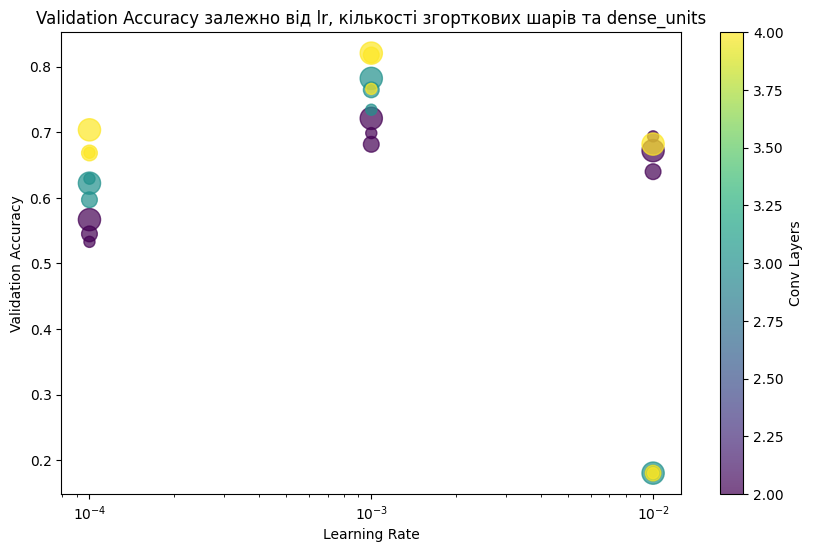

In [41]:
plt.figure(figsize=(10,6))
results_df = pd.DataFrame(results, columns=["learning_rate", "conv_layers", "dense_units", "accuracy"])
plt.scatter(results_df["learning_rate"], results_df["accuracy"],
           c=results_df["conv_layers"], s=results_df["dense_units"]/2, alpha=0.7)
plt.colorbar(label="Conv Layers")
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy –∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥ lr, –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –∑–≥–æ—Ä—Ç–∫–æ–≤–∏—Ö —à–∞—Ä—ñ–≤ —Ç–∞ dense_units")
plt.show()

**–ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ –Ω–∞–≤—á–µ–Ω–æ—ó –º–æ–¥–µ–ª—ñ**:
   - –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î–º–æ ResNet50 –∑ –≤–∞–≥–æ–≤–∏–º–∏ –∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç–∞–º–∏ ImageNet

**–ú–æ–¥–∏—Ñ—ñ–∫–∞—Ü—ñ—è –º–æ–¥–µ–ª—ñ –¥–ª—è –Ω–∞—à–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è**:
   - –ó–∞–º–æ—Ä–æ–∂—É—î–º–æ –ø–µ—Ä—à—ñ 6 —à–∞—Ä—ñ–≤ –º–æ–¥–µ–ª—ñ (–≤–æ–Ω–∏ –º—ñ—Å—Ç—è—Ç—å –Ω–∏–∑—å–∫–æ—Ä—ñ–≤–Ω–µ–≤—ñ —Ñ—ñ–ª—å—Ç—Ä–∏, —è–∫—ñ –∫–æ—Ä–∏—Å–Ω—ñ –¥–ª—è –±—É–¥—å-—è–∫–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è –∫–æ–º–ø'—é—Ç–µ—Ä–Ω–æ–≥–æ –∑–æ—Ä—É)
   - –ó–∞–º—ñ–Ω—é—î–º–æ –æ—Å—Ç–∞–Ω–Ω—ñ–π –ø–æ–≤–Ω–æ–∑–≤'—è–∑–Ω–∏–π —à–∞—Ä –Ω–∞ –Ω–æ–≤–∏–π –∑ 6 –≤–∏—Ö–æ–¥–∞–º–∏ (–≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ –¥–æ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –Ω–∞—à–∏—Ö –∫–ª–∞—Å—ñ–≤)



In [30]:
model_ft = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
ct = 0
for child in model_ft.children():
    ct += 1
    if ct < 6:
        for param in child.parameters():
            param.requires_grad = False

model_ft.fc = nn.Linear(model_ft.fc.in_features, 6)
model_ft = model_ft.to(device)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model_ft.parameters()), lr=0.0001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

num_epochs = 20
best_acc = 0.0

for epoch in range(num_epochs):
    model_ft.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / total
    train_acc = correct / total

    model_ft.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_ft(inputs)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_loss += loss.item() * inputs.size(0)

    val_acc = val_correct / val_total
    scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Val Loss: {val_loss/val_total:.4f} Acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_model_wts = model_ft.state_dict()

model_ft.load_state_dict(best_model_wts)

Epoch 1/20 | Train Loss: 0.3325 Acc: 0.8872 | Val Loss: 0.2122 Acc: 0.9312
Epoch 2/20 | Train Loss: 0.2110 Acc: 0.9245 | Val Loss: 0.2011 Acc: 0.9334
Epoch 3/20 | Train Loss: 0.1747 Acc: 0.9365 | Val Loss: 0.2342 Acc: 0.9238
Epoch 4/20 | Train Loss: 0.1391 Acc: 0.9529 | Val Loss: 0.2494 Acc: 0.9202
Epoch 5/20 | Train Loss: 0.1145 Acc: 0.9602 | Val Loss: 0.2315 Acc: 0.9213
Epoch 6/20 | Train Loss: 0.0677 Acc: 0.9774 | Val Loss: 0.2036 Acc: 0.9387
Epoch 7/20 | Train Loss: 0.0455 Acc: 0.9857 | Val Loss: 0.2083 Acc: 0.9352
Epoch 8/20 | Train Loss: 0.0377 Acc: 0.9874 | Val Loss: 0.2192 Acc: 0.9366
Epoch 9/20 | Train Loss: 0.0270 Acc: 0.9927 | Val Loss: 0.2274 Acc: 0.9394
Epoch 10/20 | Train Loss: 0.0226 Acc: 0.9935 | Val Loss: 0.2496 Acc: 0.9309
Epoch 11/20 | Train Loss: 0.0212 Acc: 0.9941 | Val Loss: 0.2442 Acc: 0.9348
Epoch 12/20 | Train Loss: 0.0201 Acc: 0.9941 | Val Loss: 0.2358 Acc: 0.9359
Epoch 13/20 | Train Loss: 0.0190 Acc: 0.9947 | Val Loss: 0.2243 Acc: 0.9412
Epoch 14/20 | Train L

<All keys matched successfully>

In [31]:
test_preds = []
test_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

print(f"Transfer Learning Test Acc: {accuracy_score(test_labels, test_preds):.4f}")

Transfer Learning Test Acc: 0.9380


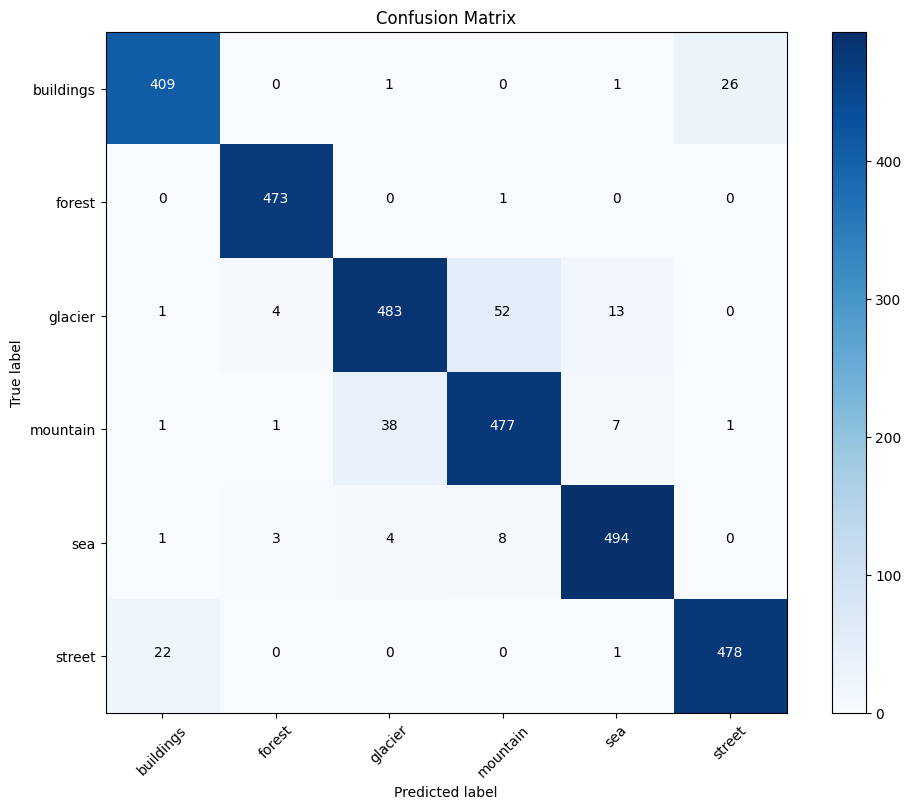

In [33]:
class_names = full_train_dataset.classes
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(10,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

–Ø–∫ –º–æ–∂–Ω–∞ –ø–æ–º—ñ—Ç–∏—Ç–∏ –ø–æ –≥–∞—Ä–Ω—ñ–π —Å–∏–Ω—ñ–π –¥—ñ–∞–≥–æ–Ω–∞–ª—ñ –Ω–∞ –º–∞—Ç—Ä–∏—Ü—ñ, –º–æ–¥–µ–ª—å –≥–∞—Ä–Ω–æ —Å–ø—Ä–∞–≤–ª—è—î—Ç—å—Å—è –∑ —Ä–æ–∑–ø—ñ–∑–Ω–∞–≤–∞–Ω–Ω—è–º —É—Å—ñ—Ö –æ–±'—î–∫—Ç—ñ–≤, –Ω–∞–π–±—ñ–ª—å—à–µ —Ç—Ä—É–¥–Ω–æ—â—ñ–≤ –≤–∏–Ω–∏–∫–∞—î –∑ –≥–æ—Ä–∞–º–∏ —Ç–∞ –ª—å–æ–¥–æ–≤–∏–∫–∞–º–∏, —â–æ –π –ª–æ–≥—ñ—á–Ω–æ, –±–æ –ª—å–æ–¥–æ–≤–∏–∫ —Ü–µ –ø–æ —Å—É—Ç—ñ –≥–æ—Ä–∞ –ª—å–æ–¥—É) –©–æ–± –ø–µ—Ä–µ–≤—ñ—Ä–∏—Ç–∏ –Ω–∞—Å–∫—ñ–ª—å–∫–∏ –ø—Ä–∞–≤–¥–∏–≤–∞ —Ü—è —Ç–µ–∑–∞ –¥–∞–≤–∞–π—Ç–µ –≤–∏–≤–µ–¥–µ–º–æ –≤—Å—ñ —É–Ω—ñ–∫–∞–ª—å–Ω—ñ –∫–ª–∞—Å–∏ –∑–æ–±—Ä–∞–∂–µ–Ω—å, –¥–µ –º–æ–¥–µ–ª—å –∑—Ä–æ–±–∏–ª–∞ –ø–æ–º–∏–ª–∫—É.

Found 19 unique misclassification patterns


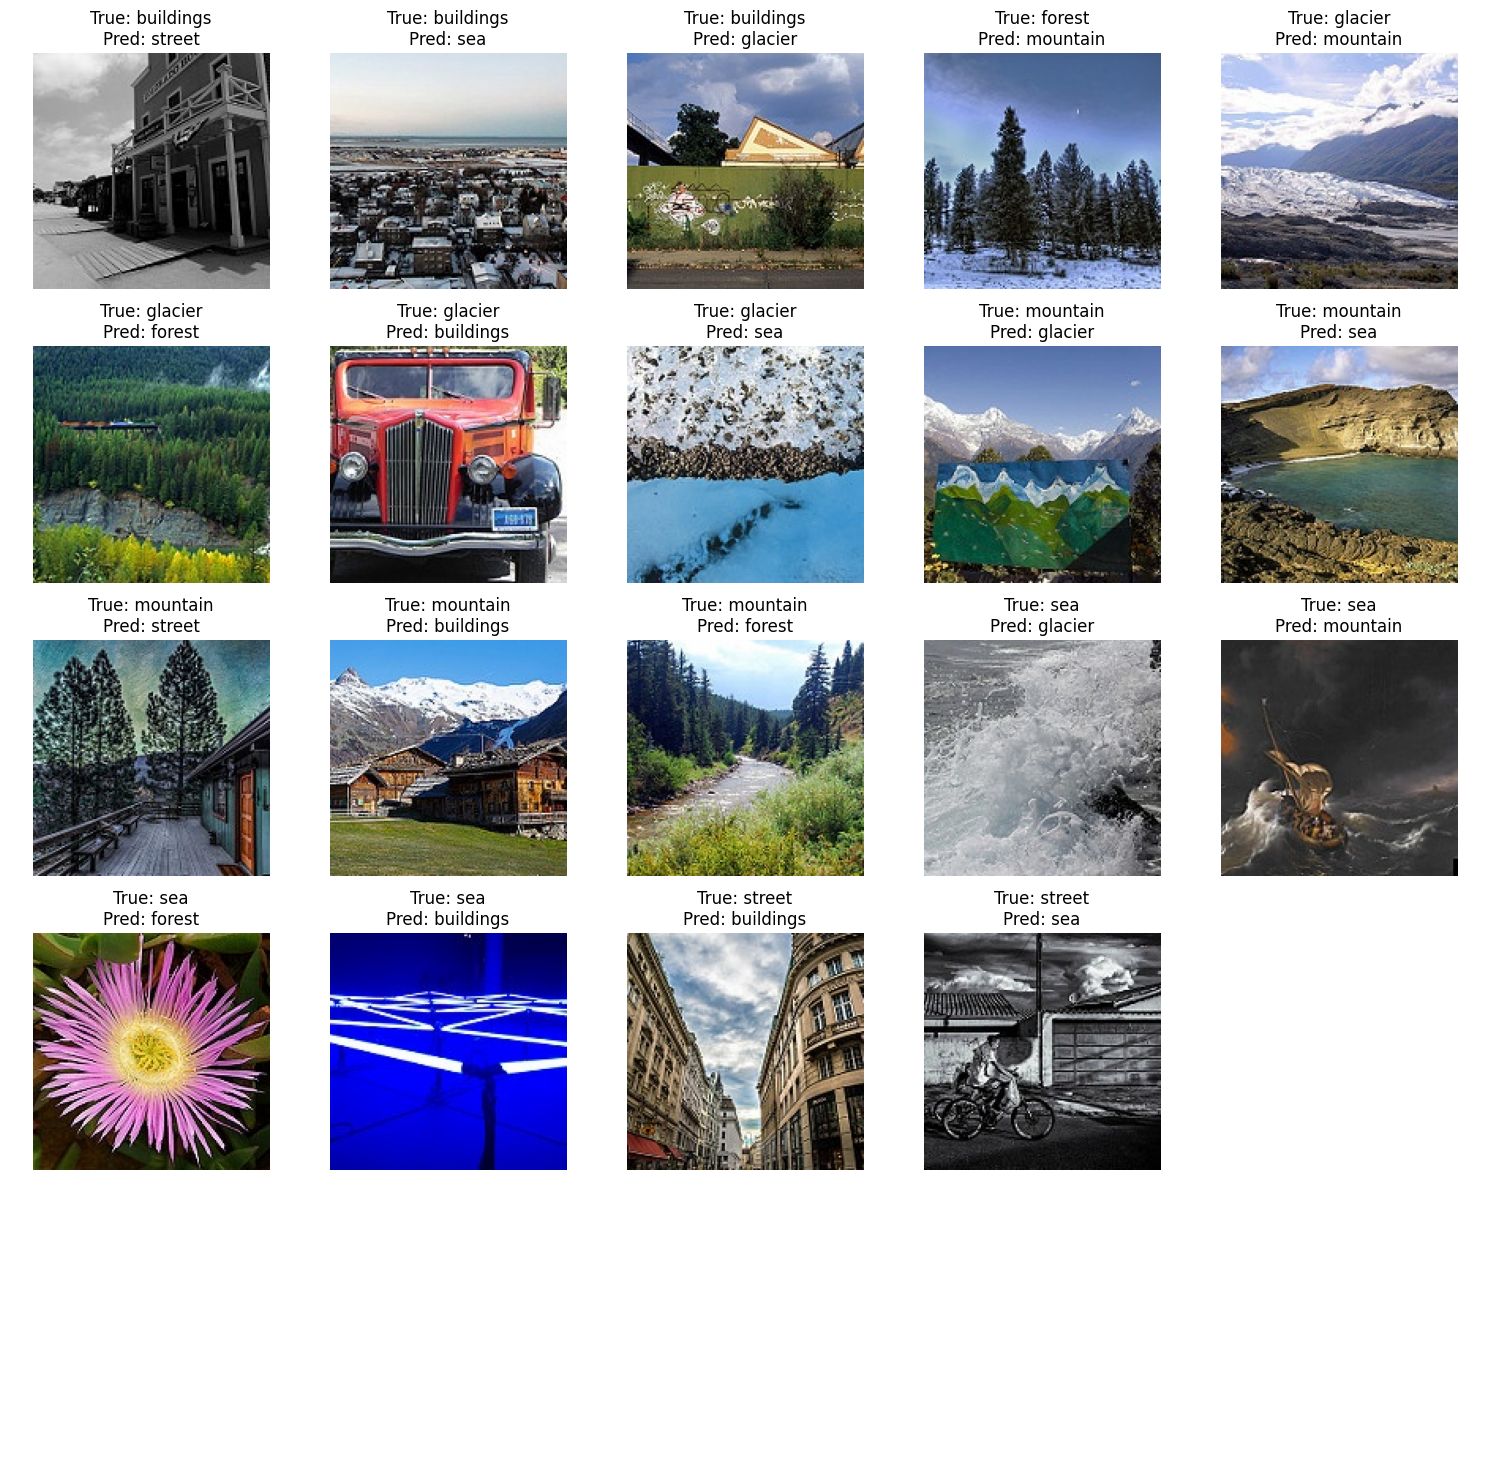

In [43]:
unique_misclassifications = {}
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for i in range(inputs.size(0)):
            if preds[i] != labels[i]:
                true_class = labels[i].item()
                pred_class = preds[i].item()
                key = (true_class, pred_class)
                if key not in unique_misclassifications:
                    unique_misclassifications[key] = inputs[i].cpu()

print(f"Found {len(unique_misclassifications)} unique misclassification patterns")

grid_size = int(np.ceil(np.sqrt(len(unique_misclassifications))))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
axes = axes.flatten()

for i, ((true, pred), img) in enumerate(unique_misclassifications.items()):
    if i < len(axes):
        ax = axes[i]
        img = img.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        ax.set_title(f'True: {class_names[true]}\nPred: {class_names[pred]}')
        ax.axis('off')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

–î—è–∫—É—é –∑–∞ —Ü–µ–π —á—É–¥–æ–≤–∏–π –∫—É—Ä—Å! üôÇ